In [ ]:
import numpy as np
import torch


lower_trs = -10
higher_trs = 10



def f(x):
    return x * np.sin(x)

x_range = np.linspace(lower_trs, higher_trs, 100)
y_true = f(x_range)

np.random.seed(42)
n_training_samples = 10000

x_train = np.random.uniform(low=lower_trs, high=higher_trs, size=n_training_samples)
print(x_train.shape)

y_train = f(x_train) + np.random.normal(loc=0.0, scale=0.21, size=n_training_samples) + np.random.normal(loc=0.0, scale=0.37, size=n_training_samples) * x_train
print(y_train.shape)

x_train = torch.tensor(x_train).view(-1, 1)
y_train = torch.tensor(y_train).view(-1, 1)

(10000,)
(10000,)


In [ ]:
n_test_samples = 150

x_test = np.random.uniform(low=lower_trs, high=higher_trs, size=n_test_samples)

y_test = f(x_test) + np.random.normal(loc=0.0, scale=0.21, size=n_test_samples) + np.random.normal(loc=0.0, scale=0.37, size=n_test_samples) * x_test

x_test = torch.tensor(x_train).view(-1, 1)
y_test = torch.tensor(y_train).view(-1, 1)


<ipython-input-3-e6132f6757ac>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_train).view(-1, 1)
<ipython-input-3-e6132f6757ac>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_train).view(-1, 1)


Text(0.5, 1.0, 'Training data set')

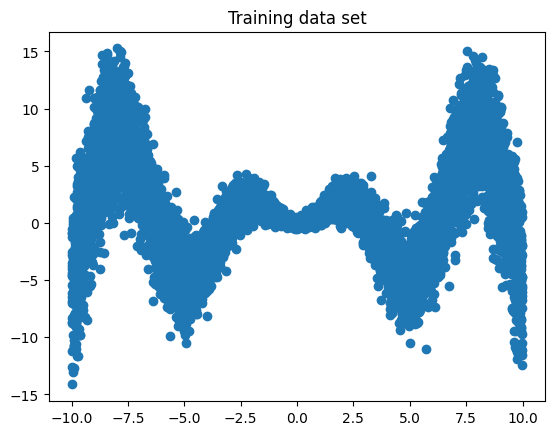

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.title('Training data set')

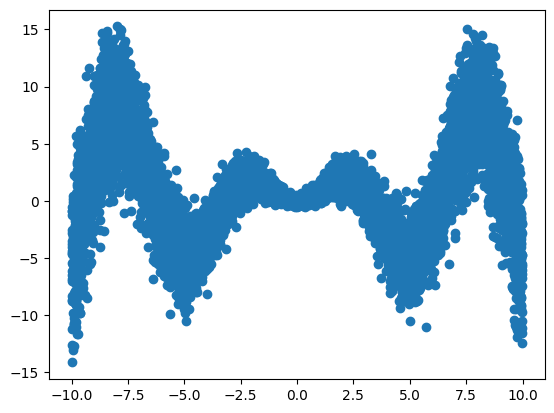

In [ ]:
plt.scatter(x_test, y_test)

In [ ]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.layers = nn.Sequential(
      torch.nn.Linear(1, 8),
      torch.nn.ReLU(),
      torch.nn.Linear(8,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,4),
      torch.nn.ReLU(),
    )
    self.mean_head = torch.nn.Linear(4, 1)
    self.var_head = nn.Sequential(
        torch.nn.Linear(4, 1),
        torch.nn.ReLU(),
        )

    self.double()

  def forward(self, x):
    features = self.layers(x)
    mean = self.mean_head(features)
    variance = self.var_head(features)
    return mean, variance

  def predict(self, x):
    mean, variance = self(x)
    return mean, variance






In [ ]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

EPOCH_NUMBER = 100


x_train_tensor = torch.tensor(x_train, dtype=torch.double)
y_train_tensor = torch.tensor(y_train, dtype=torch.double)

dataset = TensorDataset(x_train_tensor, y_train_tensor)

# Create a DataLoader to iterate over batches of data
batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = Network().to(device)
loss_function = torch.nn.GaussianNLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)
loss_values = []

for epoch in range(EPOCH_NUMBER):
      epoch_loss = 0
      for batch_x, batch_y in dataloader:
        #batch_x = batch_x.to(device)
        #batch_y = batch_y.to(device)

        optimizer.zero_grad()

        # Forward pass
        batch_prediction, batch_variance = model(batch_x)

        # Compute loss
        loss = loss_function(batch_prediction, batch_y, batch_variance)
        epoch_loss += loss.item()

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()
      print(epoch_loss)
      loss_values.append(epoch_loss)


print("Training completed")

<ipython-input-18-ba7368599e0d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train, dtype=torch.double)
<ipython-input-18-ba7368599e0d>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.double)


19035.003185481975
7703.403912249939
4841.796710387399
3603.559741654847
2958.1779342220448
2584.2999766565717
2370.997218775525
2262.7066066164857
2214.2047136895458
2190.389659700691
2172.3079973399567
2145.5242451669346
2094.2330829359753
2033.181075767409
2014.8616411830444
2014.8211601019825
2004.2625949501726
1997.8188352109858
1991.2234183121502
1984.0221797900183
1976.0103631167867
1966.8900096652724
1956.7596598654948
1946.1149410880164
1934.7647047715814
1922.7319559151
1910.0623510699804
1896.7892686975174
1885.0479443083086
1871.0397832380024
1858.3469392472052
1845.0427235300742
1832.2201346967156
1819.523927362028
1804.416725468969
1792.1821404024504
1780.9289933823152
1771.2258030816934
1762.624590798673
1755.3639382985486
1749.3156197871836
1743.4640857896707
1738.4058956703786
1735.545513961308
1730.5731462487677
1727.6605084765004
1725.1417612649798
1721.4080288079779
1718.2560676985318
1714.7324177631144
1711.5490485851778
1709.8510069501242
1707.5211294290716
1705.0

Text(0, 0.5, 'Average loss per epoch')

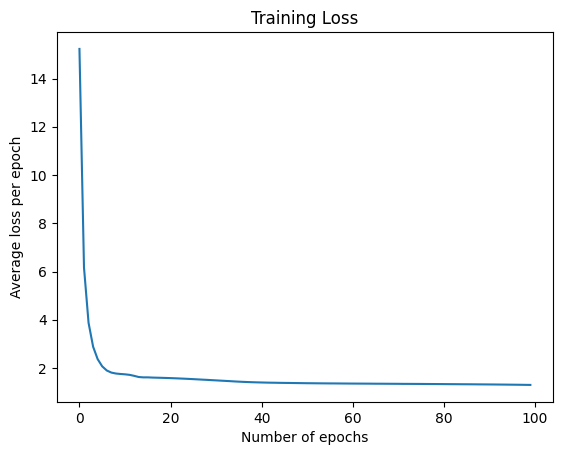

In [ ]:
plt.plot(np.divide(loss_values,10000/8))
plt.title('Training Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Average loss per epoch')

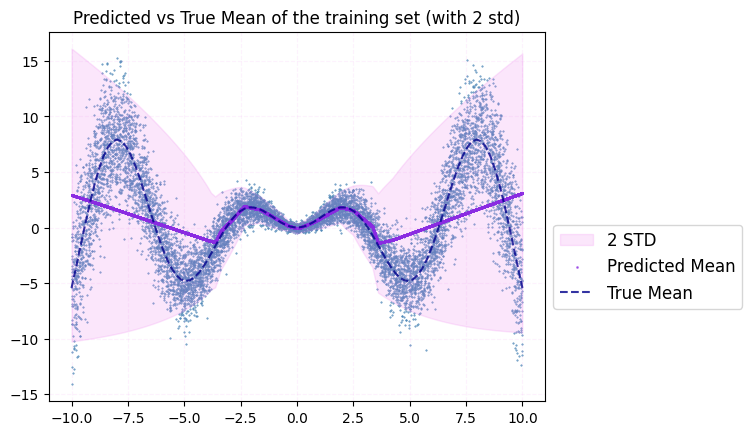

In [ ]:
from torch.distributions import Normal
import math


mean_predict, std_predict = model.predict(x_train)
mean_predict = mean_predict.detach().numpy()
std_predict = std_predict.detach().numpy()
x_train_flattenned = x_train.flatten()
std_predict = np.sqrt(std_predict)

sorted_indices = np.argsort(x_train_flattenned)

x_train_sorted = x_train[sorted_indices].flatten()
y_train_sorted = y_train[sorted_indices]

mean_predict_flattened = mean_predict[sorted_indices].flatten()
std_predict_flattened = std_predict[sorted_indices].flatten()


plt.scatter(x_train, y_train, color ='steelblue', s = 0.2)
plt.fill_between(x_train_sorted, mean_predict_flattened - 2 * std_predict_flattened, mean_predict_flattened + 2 * std_predict_flattened, color='violet', alpha=0.2, label='2 STD')
plt.scatter(x_train, mean_predict, s = 1, color ='blueviolet', alpha = 0.6, label='Predicted Mean')
plt.plot(x_range, y_true, linestyle='--', color ='darkblue', alpha = 0.8, label='True Mean')


plt.title('Predicted vs True Mean of the training set (with 2 std)')
plt.grid(True, linestyle='--', alpha=0.1, color = "violet")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)

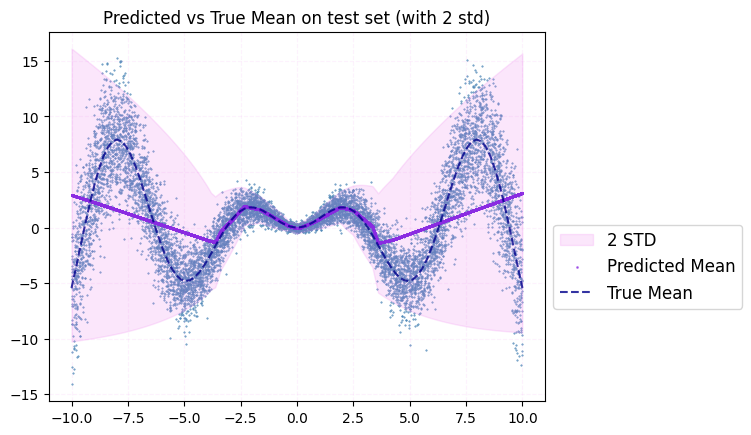

In [ ]:
mean_predict_test, std_predict_test = model.predict(x_test)
mean_predict_test = mean_predict_test.detach().numpy()
std_predict_test = std_predict_test.detach().numpy()
x_test_flattenned = x_test.flatten()
std_predict_test = np.sqrt(std_predict_test)

sorted_indices_test = np.argsort(x_test_flattenned)

x_test_sorted = x_test[sorted_indices_test].flatten()
y_test_sorted = y_test[sorted_indices_test]

mean_predict_flattened = mean_predict_test[sorted_indices_test].flatten()
std_predict_flattened = std_predict_test[sorted_indices_test].flatten()

plt.scatter(x_test, y_test, color ='steelblue', s = 0.2)
plt.fill_between(x_test_sorted, mean_predict_flattened - 2 * std_predict_flattened, mean_predict_flattened + 2 * std_predict_flattened, color='violet', alpha=0.2, label='2 STD')
plt.scatter(x_test_sorted, mean_predict_flattened, s = 1, color ='blueviolet', alpha = 0.6, label='Predicted Mean')
plt.plot(x_range, y_true, linestyle='--', color ='darkblue', alpha = 0.8, label='True Mean')


plt.title('Predicted vs True Mean on test set (with 2 std)')
plt.grid(True, linestyle='--', alpha=0.1, color = "violet")
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=12)
